# Protocol 1

In [2]:
import util
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import colors
from PIL import Image

def get_models_epochs(file_dict):
    row = []
    for alias, file_path in file_dict.items():
        folder = str(file_path).split('/')[:-1]
        ckp1 = '/'.join(folder)+'/'+folder[-1]+'_best.pth'
        if alias == "$S_2$":
            ckp2 = '/'.join(folder)+'/'+folder[-1]+'_119.pth'
        else:
            ckp2 = '/'.join(folder)+'/'+folder[-1]+'_curr.pth'
        epoch1 = util.get_checkpoint_epoch(ckp1)
        epoch2 = util.get_checkpoint_epoch(ckp2)
        row.append((alias, epoch1, epoch2))
    return pd.DataFrame(row, columns =['Name', 'best', 'curr'])

In [2]:
util.dataset_info('data/p1')

,split,classes,size,kn size,kn (%),kn_unk size,kn_unk (%),unk_unk size,unk_unk (%)
0,train,117,185892,116212,62.5%,69680,37.5%,0,0.0%
1,val,117,46481,29061,62.5%,17420,37.5%,0,0.0%
2,test,118,17450,5800,33.2%,3350,19.2%,8300,47.6%


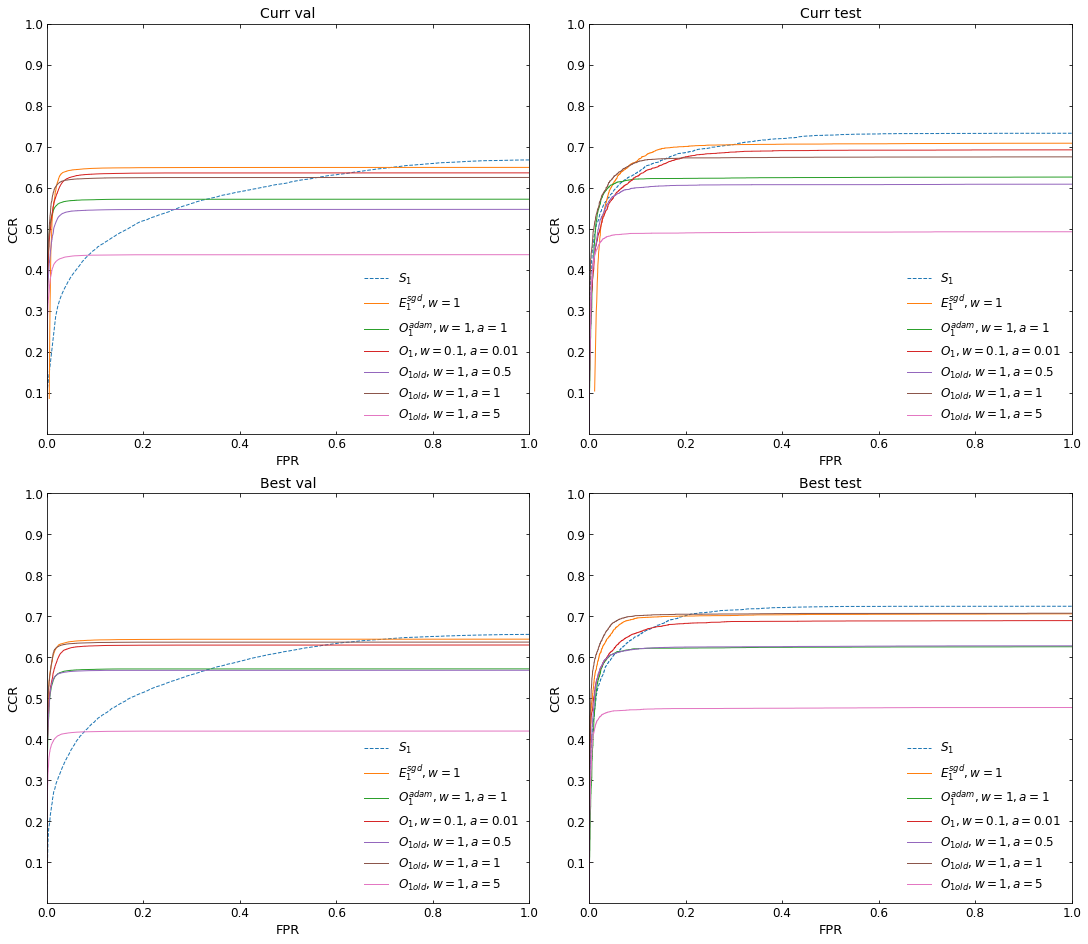

In [4]:
hdir = Path('/local/scratch/palechor/adversarialTraining/palechor_prod/runs')
out_dir = Path('/local/scratch/palechor/adversarialTraining/palechor_prod/outputs')
p1_files = {
    # Base
    '$S_1$': out_dir/'s1n_l1_e0_adam_d40_g0.3/s1n_l1_e0_adam_d40_g0.3_curr_val_arr.npz',
    '$E_1^{sgd}, w=1$': out_dir/'e1n_w1_l1_e0_sgd_d40_g0.3/e1n_w1_l1_e0_sgd_d40_g0.3_curr_val_arr.npz',
    # '$E_1^{old}, w=1$': hdir/'e1n_a0_w1_l1_t5_x0_e0_af/e1n_a0_w1_l1_t5_x0_e0_af_curr_val_arr.npz',
    '$O_1^{adam}, w=1, a=1$': out_dir/'o1n_a1_w1_l1_e0_adam_d40_g0.3/o1n_a1_w1_l1_e0_adam_d40_g0.3_curr_val_arr.npz',

    # Fine tune softmax with entropic adversarials
    # '$E_1^{adam}, w=1, \epsilon=0.5, S_{AD}^{full}$': out_dir/'e1n_w1_l1_e5_adam_d40_g0.3_full_FSA/e1n_w1_l1_e5_adam_d40_g0.3_full_FSA_curr_val_arr.npz',
    # '$E_1^{sgd},  w=1, \epsilon=0.5, S_{AD}^{full}, ep=40$': out_dir/'e1n_w1_l0.1_e5_sgd_full_FSA/e1n_w1_l0.1_e5_sgd_full_FSA_curr_val_arr.npz',
    # '$E_1^{sgd}, w=0.1,\epsilon=0.5, S_{AD}^{full}, d=20, ep=40$': out_dir/'e1n_w0.1_l1_e5_sgd_d20_g0.3_full_FSA/e1n_w0.1_l1_e5_sgd_d20_g0.3_full_FSA_curr_val_arr.npz',
    # '$E_1^{sgd}, w=1, \epsilon=0.5, S_{AD}^{filter}$': out_dir/'e1n_w1_l0.1_e5_sgd_filter_ep40_FSA/e1n_w1_l0.1_e5_sgd_filter_ep40_FSA_curr_val_arr.npz',
    # '$E_1^{sgd}, w=1,   \epsilon=0.2, S_{AD}^{full}$': out_dir/'e1n_w1_l0.1_e2_sgd_full_ep40_FSA/e1n_w1_l0.1_e2_sgd_full_ep40_FSA_curr_val_arr.npz',
    # '$E_1^{sgd}, w=1,   \epsilon=0.2, S_{AD}^{filter}$': out_dir/'e1n_w1_l0.1_e2_sgd_filter_ep40_FSA/e1n_w1_l0.1_e2_sgd_filter_ep40_FSA_curr_val_arr.npz',
    
    # Fine tune entropic with entropic adversarials
    # '$E_1^{adam}, \epsilon=0.5, E_{AD}^{full}$': out_dir/'e1n_w1_l1_e5_adam_d40_g0.3_full_FEA/e1n_w1_l1_e5_adam_d40_g0.3_full_FEA_curr_val_arr.npz',

    # # Entropic
    # "$E_1^{1old}, w=1, t=3$": hdir/'e1_a0_w1_l1_t3_x0_e0_af/e1_a0_w1_l1_t3_x0_e0_af_best_val_arr.npz',  # delete
    # "$E_1^{1old}, w=1, e=0.2$": hdir/'e1_a0_w1_l1_t8_x0_e2_at/e1_a0_w1_l1_t8_x0_e2_at_curr_val_arr.npz', # delete
    # "$E_1^{1old}, w=1, e=0.5$": hdir/'e1_a0_w1_l1_t8_x0_e5_at/e1_a0_w1_l1_t8_x0_e5_at_best_val_arr.npz', # delete
    

    "$O_1, w=0.1, a=0.01$": hdir/'o1n_a0.01_w0.1_l1_t5_x10_e0_af/o1n_a0.01_w0.1_l1_t5_x10_e0_af_curr_val_arr.npz',
    "$O_{1old}, w=1, a=0.5$": hdir/'o1_a0.5_w1_l1_t8_x10_e0_af/o1_a0.5_w1_l1_t8_x10_e0_af_curr_val_arr.npz',
    "$O_{1old}, w=1, a=1$":  hdir/'o1_a1_w1_l1_t8_x10_e0_af/o1_a1_w1_l1_t8_x10_e0_af_curr_val_arr.npz',
    "$O_{1old}, w=1, a=5$": hdir/'o1_a5_w1_l1_t8_x10_e0_af/o1_a5_w1_l1_t8_x10_e0_af_curr_val_arr.npz',
    
    # # Trainign method
    # '$E_1^{old}, w=0.1, d=40, FTS_{adam}^{full}$': hdir/'e1n_a0.01_w0.1_l1_t5_x10_e5_at_FT4_lrd40_full/e1n_a0.01_w0.1_l1_t5_x10_e5_at_FT4_lrd40_full_curr_val_arr.npz',
   
}


arrays_curr = util.read_array_list(p1_files)
arrays_test_curr = util.read_array_list(util.transform_to_test(p1_files))

arrays_best = util.read_array_list(util.get_best_arrays(p1_files))
arrays_test_best = util.read_array_list(util.transform_to_test(util.get_best_arrays(p1_files)))

fig, ax = plt.subplots(2,2, figsize=(15,13), constrained_layout=True)
axs = ax.flat
util.plot_oscr(arrays_curr, split='val', scale='linear', use_norms=False, base_line=True,
               title='Curr val', linewidth=1, ax_label_font=13, ax=axs[0])
util.plot_oscr(arrays_test_curr, split='test', scale='linear', use_norms=False, base_line=True,
               title='Curr test', linewidth=1, ax_label_font=13, ax=axs[1])
util.plot_oscr(arrays_best, split='val', scale='linear', use_norms=False, base_line=True,
               title='Best val', linewidth=1, ax_label_font=13, ax=axs[2])
util.plot_oscr(arrays_test_best, split='test', scale='linear', use_norms=False, base_line=True,
               title='Best test', linewidth=1, ax_label_font=13, ax=axs[3])

In [ ]:
util.get_checkpoint_epoch('outputs/e1n_w1_l0.1_e2_sgd_filter_ep40_FSA/e1n_w1_l0.1_e2_sgd_filter_ep40_FSA_curr.pth')

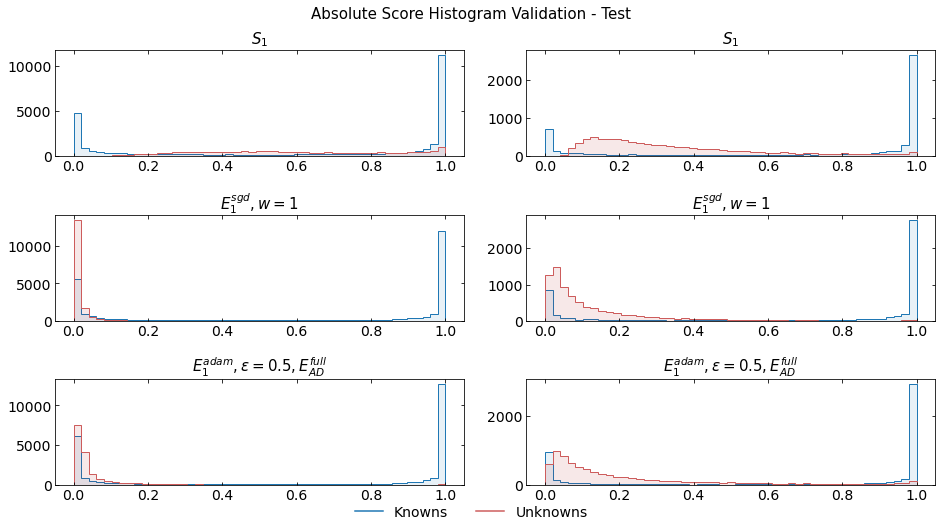

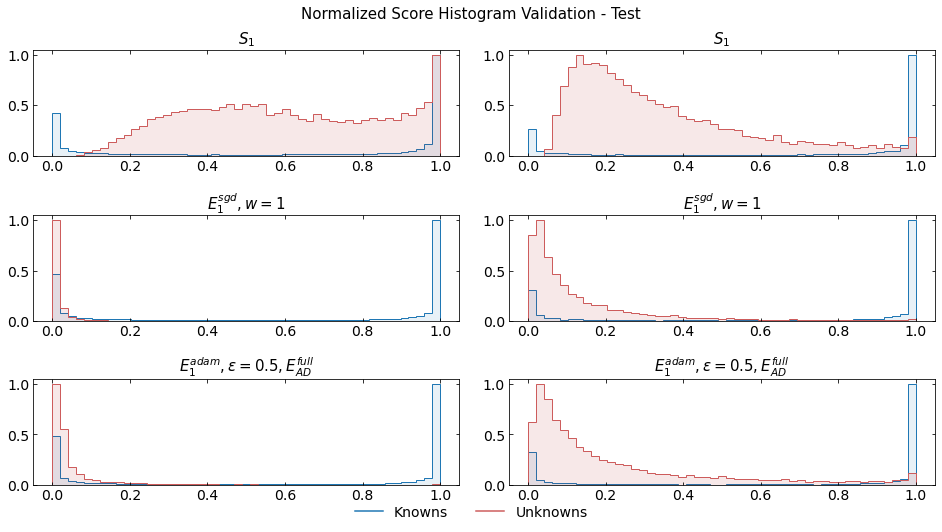

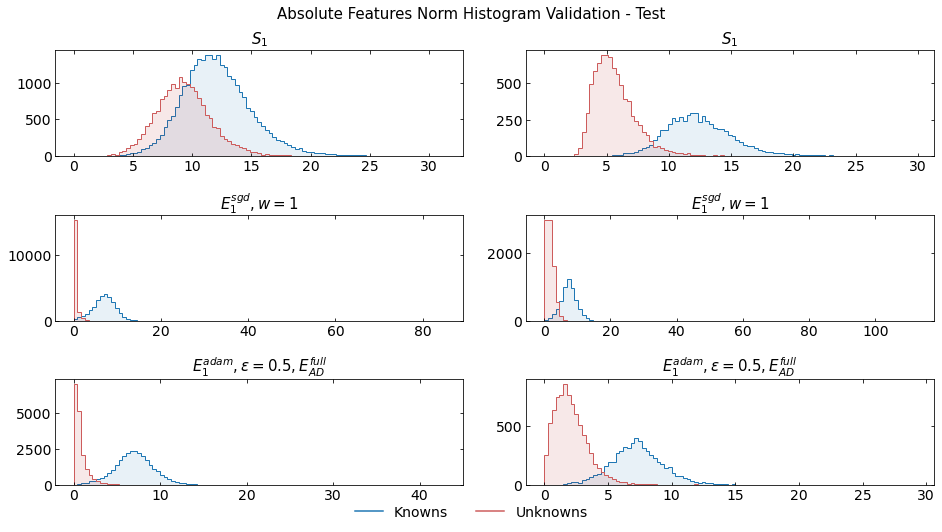

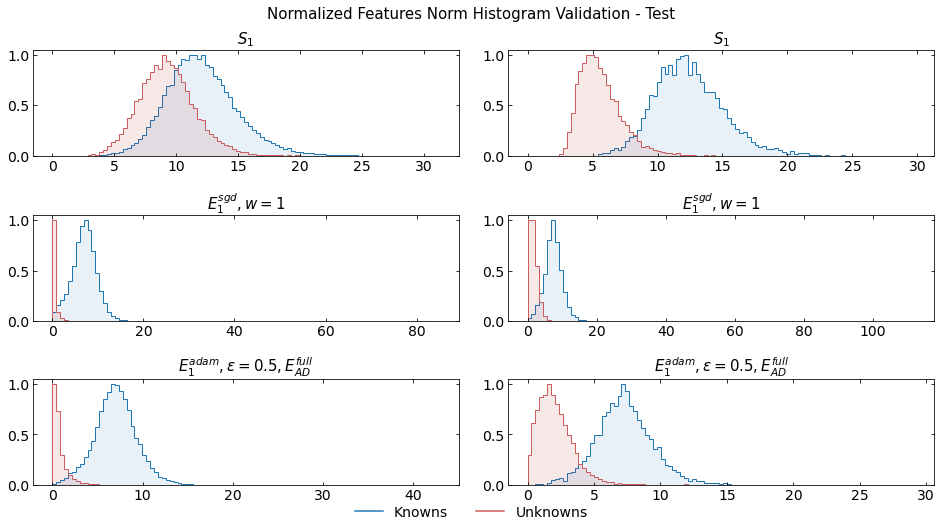

In [9]:
hdir = Path('/local/scratch/palechor/adversarialTraining/palechor_prod/runs')
out_dir = Path('/local/scratch/palechor/adversarialTraining/palechor_prod/outputs')
p1_files = {
    # Base
    '$S_1$': out_dir/'s1n_l1_e0_adam_d40_g0.3/s1n_l1_e0_adam_d40_g0.3_curr_val_arr.npz',
    '$E_1^{sgd}, w=1$': out_dir/'e1n_w1_l1_e0_sgd_d40_g0.3/e1n_w1_l1_e0_sgd_d40_g0.3_curr_val_arr.npz',
    # '$E_1^{old}, w=1$': hdir/'e1n_a0_w1_l1_t5_x0_e0_af/e1n_a0_w1_l1_t5_x0_e0_af_curr_val_arr.npz',
    # '$O_1^{adam}, w=1, a=1$': out_dir/'o1n_a1_w1_l1_e0_adam_d40_g0.3/o1n_a1_w1_l1_e0_adam_d40_g0.3_curr_val_arr.npz',

    # Fine tune softmax with entropic adversarials
    # '$E_1^{adam}, w=1, \epsilon=0.5, S_{AD}^{full}$': out_dir/'e1n_w1_l1_e5_adam_d40_g0.3_full_FSA/e1n_w1_l1_e5_adam_d40_g0.3_full_FSA_curr_val_arr.npz',
    # '$E_1^{sgd},  w=1, \epsilon=0.5, S_{AD}^{full}, ep=40$': out_dir/'e1n_w1_l0.1_e5_sgd_full_FSA/e1n_w1_l0.1_e5_sgd_full_FSA_curr_val_arr.npz',
    # '$E_1^{sgd}, w=0.1,\epsilon=0.5, S_{AD}^{full}, d=20, ep=40$': out_dir/'e1n_w0.1_l1_e5_sgd_d20_g0.3_full_FSA/e1n_w0.1_l1_e5_sgd_d20_g0.3_full_FSA_curr_val_arr.npz',
    # '$E_1^{sgd}, w=1, \epsilon=0.5, S_{AD}^{filter}$': out_dir/'e1n_w1_l0.1_e5_sgd_filter_ep40_FSA/e1n_w1_l0.1_e5_sgd_filter_ep40_FSA_curr_val_arr.npz',
    # '$E_1^{sgd}, w=1,   \epsilon=0.2, S_{AD}^{full}$': out_dir/'e1n_w1_l0.1_e2_sgd_full_ep40_FSA/e1n_w1_l0.1_e2_sgd_full_ep40_FSA_curr_val_arr.npz',
    
    # Fine tune entropic with entropic adversarials
    '$E_1^{adam}, \epsilon=0.5, E_{AD}^{full}$': out_dir/'e1n_w1_l1_e5_adam_d40_g0.3_full_FEA/e1n_w1_l1_e5_adam_d40_g0.3_full_FEA_curr_val_arr.npz',

    # # Entropic
    # "$E_1^{1old}, w=1, t=3$": hdir/'e1_a0_w1_l1_t3_x0_e0_af/e1_a0_w1_l1_t3_x0_e0_af_best_val_arr.npz',  # delete
    # "$E_1^{1old}, w=1, e=0.2$": hdir/'e1_a0_w1_l1_t8_x0_e2_at/e1_a0_w1_l1_t8_x0_e2_at_curr_val_arr.npz', # delete
    # "$E_1^{1old}, w=1, e=0.5$": hdir/'e1_a0_w1_l1_t8_x0_e5_at/e1_a0_w1_l1_t8_x0_e5_at_best_val_arr.npz', # delete
    

    # "$O_1, w=0.1, a=0.01$": hdir/'o1n_a0.01_w0.1_l1_t5_x10_e0_af/o1n_a0.01_w0.1_l1_t5_x10_e0_af_curr_val_arr.npz',
    # "$O_{1old}, w=1, a=0.5$": hdir/'o1_a0.5_w1_l1_t8_x10_e0_af/o1_a0.5_w1_l1_t8_x10_e0_af_curr_val_arr.npz',
    # "$O_{1old}, w=1, a=1$":  hdir/'o1_a1_w1_l1_t8_x10_e0_af/o1_a1_w1_l1_t8_x10_e0_af_curr_val_arr.npz',
    # "$O_{1old}, w=1, a=5$": hdir/'o1_a5_w1_l1_t8_x10_e0_af/o1_a5_w1_l1_t8_x10_e0_af_curr_val_arr.npz',
    
    # # Trainign method
    # '$E_1^{old}, w=0.1, d=40, FTS_{adam}^{full}$': hdir/'e1n_a0.01_w0.1_l1_t5_x10_e5_at_FT4_lrd40_full/e1n_a0.01_w0.1_l1_t5_x10_e5_at_FT4_lrd40_full_curr_val_arr.npz',
   
}


arrays_curr = util.read_array_list(p1_files)
arrays_test_curr = util.read_array_list(util.transform_to_test(p1_files))

arrays_best = util.read_array_list(util.get_best_arrays(p1_files))
arrays_test_best = util.read_array_list(util.transform_to_test(util.get_best_arrays(p1_files)))
util.plot_histogram_val_test(arrays_best, arrays_test_best, metric='score', bins=50, figsize=(13,7), title='Absolute Score Histogram Validation - Test',
                             split='test', font=14, sharex=True, sharey=False, log=False, normalized=False)
util.plot_histogram_val_test(arrays_best, arrays_test_best, metric='score', bins=50, figsize=(13,7), title='Normalized Score Histogram Validation - Test',
                             split='test', font=14, sharex=True, sharey=False, log=False, normalized=True)
util.plot_histogram_val_test(arrays_best, arrays_test_best, metric='norm', bins=100, figsize=(13,7), title='Absolute Features Norm Histogram Validation - Test',
                             split='test', font=14, sharex=False, sharey=False, log=False, normalized=False)
util.plot_histogram_val_test(arrays_best, arrays_test_best, metric='norm', bins=100, figsize=(13,7), title='Normalized Features Norm Histogram Validation - Test',
                             split='test', font=14, sharex=False, sharey=False, log=False, normalized=True)